## Pruebas con la herramienta MediaPipe

#### Importación de liberías

In [1]:
# Importación de librerías
import cv2
import math
import time
import glob
import scipy.signal
import numpy as np
import pandas as pd
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

from matplotlib import pyplot as plt
%matplotlib inline

#### Definición de funciones para leer los vídeos y mostrar fotogramas

In [2]:
'''
Se obtienen los fotogramas de uno en uno del vídeo pasado por parámetro.

Parámetros:
 - vd: vídeo del que obtener los fotogramas.
 
Retorno:
 - frame: fotograma actual del vídeo.
'''
def frameVideo(vd):
    vc = cv2.VideoCapture(vd)

    if (vc.isOpened()==False):
        print("Error")
    else:
        while(vc.isOpened()):
            ret,frame = vc.read()
            if ret:
                yield frame
            else:
                vc.release()

In [3]:
'''
Se muestra el fotograma pasado por parámetro.

Parámetros:
 - frame: fotograma que se desea mostrar.
'''
def mostrarFrame(frame):
    plt.figure(figsize=(18, 16))
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.title("Prueba")
    plt.show()

In [4]:
'''
Se obtiene el fotograma deseado del vídeo pasado por parámetro. 

Parámetros:
 - vid: vídeo del que obtener el fotograma.
 - nframe: la posición del fotograma que se desea obtener.
 
Retorno:
 - frame: fotograma deseado del vídeo.
'''
def obtenerFrame(vid,nframe):
    vc = cv2.VideoCapture(vid)

    if (vc.isOpened()==False):
        print("Error")
        return None
    else:
        for i in range(nframe):
            ret,frame = vc.read()
        
        return frame

In [5]:
'''
Se crea un objeto de vídeo para guardar los fotogramas pasados por parámetro.

Parámetros:
 - ruta: ruta donde se desea guardar el objeto de vídeo creado.
 - frames: fotogramas que se desean guardar.
 - encoder: codificador para guardar los fotogramas. Por defecto: cv2.VideoWriter_fourcc(*'DIVX').
 - fps: los fotogramas por segundo que tendrá el vídeo creado. Por defecto: 15. 
'''
def grabarFrames(ruta,frames,encoder=cv2.VideoWriter_fourcc(*'DIVX'),fps=15):
    for i in frames:
        if i is not None:
            h,z=i.shape[:2]
            break
    size=(z,h)
    out = cv2.VideoWriter(ruta,encoder,fps,size)
    
    for i in frames:
        out.write(i)
    
    out.release()

#### Pruebas con MediaPipe

In [6]:
'''
Se redimensiona y se muestra, si se desea, el fotograma pasado por parámetro.

Parámetros:
 - frame: fotograma que se quiere redimensionar.
 - width: nueva anchura del fotograma. Por defecto: 480.
 - height: nueva altura del fotograma. Por defecto: 480.
 - show: valor booleano para indicar si se desea mostrar o no el fotograma redimensionado. Por defecto: False.
'''
def resize_and_show(frame,width=480,height=480,show=False):
    h, w = frame.shape[:2]
    if h < w:
        img = cv2.resize(frame, (width, math.floor(h/(w/width))))
    else:
        img = cv2.resize(frame, (math.floor(w/(h/height)), height))
    
    if show:
        mostrarFrame(frame)

In [7]:
'''
Se marcan los puntos de la mano del fotograma pasado por parámetro.

Parámetros:
 - frame: fotograma con la mano en donde indicar los puntos.
 - static: modo de imagen estático. Por defecto: True.
 - max_num_hands: número máximo de manos. Por defecto: 1.
 - min_detection_confidence: mímina detección de confianza. Por defecto: 0.7
 - show: valor booleano para indicar si se desea redimensionar y mostrar o no el fotograma. Por defecto: False
 
Retorno:
 - annotated_frame: fotograma con la mano.
 - results.mulit_hand_landmarks: puntos de la mano.
'''
def frameMano(frame, static=True,max_num_hands=1,min_detection_confidence=0,show=False):
    with mp_hands.Hands(static_image_mode=static,max_num_hands=max_num_hands, min_detection_confidence=min_detection_confidence) as hands:
        results = hands.process(cv2.flip(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), 1))
        frame_hight, frame_width, _ = frame.shape
        annotated_frame = cv2.flip(frame.copy(), 1)
        
        if results.multi_hand_landmarks is None:
            return annotated_frame,None
        
        for hand_landmarks in results.multi_hand_landmarks:
            # Print index finger tip coordinates.
            print(
                f'Index finger tip coordinate: (',
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * frame_width}, '
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame_hight})'
            )
            mp_drawing.draw_landmarks(annotated_frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        if show:
            resize_and_show(cv2.flip(annotated_frame, 1))
        
        return annotated_frame,results.multi_hand_landmarks

In [8]:
frames=[]
manos=[]
for i in frameVideo("../TFG/Videos/ID11_15-09-2021_DCHA (ON).mp4"):
    frame,mano = frameMano(i)
    frames.append(frame)
    manos.append(mano)

Index finger tip coordinate: ( 1261.8556594848633, 452.8369081020355)
Index finger tip coordinate: ( 1236.9330596923828, 486.10884189605713)
Index finger tip coordinate: ( 1198.7800598144531, 531.4151179790497)
Index finger tip coordinate: ( 1172.8019714355469, 538.7703466415405)
Index finger tip coordinate: ( 1167.3621368408203, 536.9402861595154)
Index finger tip coordinate: ( 1160.2630233764648, 530.9577798843384)
Index finger tip coordinate: ( 1155.490379333496, 519.2884969711304)
Index finger tip coordinate: ( 1147.2748947143555, 514.1381406784058)
Index finger tip coordinate: ( 1147.8059005737305, 510.54242491722107)
Index finger tip coordinate: ( 1150.4356384277344, 509.0055191516876)
Index finger tip coordinate: ( 1156.208267211914, 488.06140422821045)
Index finger tip coordinate: ( 1185.2735137939453, 412.43231534957886)
Index finger tip coordinate: ( 1199.475975036621, 338.82556915283203)
Index finger tip coordinate: ( 1186.424903869629, 275.2579879760742)
Index finger tip co

Index finger tip coordinate: ( 1087.2928619384766, 158.41906428337097)
Index finger tip coordinate: ( 1095.9342956542969, 161.6574615240097)
Index finger tip coordinate: ( 1135.158348083496, 231.42443776130676)
Index finger tip coordinate: ( 1128.523178100586, 363.1661331653595)
Index finger tip coordinate: ( 1115.0443267822266, 424.51966881752014)
Index finger tip coordinate: ( 1114.1439056396484, 437.4885141849518)
Index finger tip coordinate: ( 1114.0347290039062, 442.97715067863464)
Index finger tip coordinate: ( 1116.6886138916016, 452.09117889404297)
Index finger tip coordinate: ( 1121.0197448730469, 457.5591194629669)
Index finger tip coordinate: ( 1120.7137298583984, 444.5223927497864)
Index finger tip coordinate: ( 1129.6429824829102, 433.19348216056824)
Index finger tip coordinate: ( 1150.7490921020508, 361.98102593421936)
Index finger tip coordinate: ( 1149.8723602294922, 277.7927076816559)
Index finger tip coordinate: ( 1125.5122375488281, 197.3379921913147)
Index finger ti

Index finger tip coordinate: ( 1171.7404174804688, 536.0916888713837)
Index finger tip coordinate: ( 1202.2480773925781, 467.781103849411)
Index finger tip coordinate: ( 1214.516372680664, 388.3580946922302)
Index finger tip coordinate: ( 1192.1683502197266, 311.9871711730957)
Index finger tip coordinate: ( 1162.7658462524414, 254.70881760120392)
Index finger tip coordinate: ( 1140.8191680908203, 223.8728392124176)
Index finger tip coordinate: ( 1130.5134201049805, 210.22825419902802)
Index finger tip coordinate: ( 1114.8204803466797, 192.71805346012115)
Index finger tip coordinate: ( 1113.4027862548828, 180.0883412361145)
Index finger tip coordinate: ( 1125.1896286010742, 178.77901017665863)
Index finger tip coordinate: ( 1120.6562805175781, 190.5213725566864)
Index finger tip coordinate: ( 1143.617820739746, 219.2481529712677)
Index finger tip coordinate: ( 1193.3621978759766, 332.02417373657227)
Index finger tip coordinate: ( 1187.3789978027344, 463.2700037956238)
Index finger tip c

Index finger tip coordinate: ( 1038.1665802001953, 171.33842289447784)
Index finger tip coordinate: ( 1019.633674621582, 166.46334171295166)
Index finger tip coordinate: ( 1014.1518402099609, 165.18912613391876)
Index finger tip coordinate: ( 1049.8180389404297, 217.1194177865982)
Index finger tip coordinate: ( 1108.1478881835938, 361.4971339702606)
Index finger tip coordinate: ( 1079.1657257080078, 488.9666819572449)
Index finger tip coordinate: ( 1080.6793212890625, 525.2471852302551)
Index finger tip coordinate: ( 1075.3438568115234, 541.9289374351501)
Index finger tip coordinate: ( 1072.4467849731445, 546.9373512268066)
Index finger tip coordinate: ( 1071.2068176269531, 549.9706721305847)
Index finger tip coordinate: ( 1076.2839889526367, 545.4395198822021)
Index finger tip coordinate: ( 1070.530014038086, 530.9378242492676)
Index finger tip coordinate: ( 1081.8561172485352, 498.07610750198364)
Index finger tip coordinate: ( 1112.1631622314453, 420.17922163009644)
Index finger tip 

Index finger tip coordinate: ( 1054.4879150390625, 163.83706748485565)
Index finger tip coordinate: ( 1116.2862396240234, 286.0001063346863)
Index finger tip coordinate: ( 1114.4944381713867, 390.4481899738312)
Index finger tip coordinate: ( 1090.3319549560547, 447.6046693325043)
Index finger tip coordinate: ( 1089.3246459960938, 460.998215675354)
Index finger tip coordinate: ( 1093.8490676879883, 472.7538549900055)
Index finger tip coordinate: ( 1092.9289627075195, 483.47646832466125)
Index finger tip coordinate: ( 1086.2699890136719, 479.11091566085815)
Index finger tip coordinate: ( 1090.1324844360352, 475.7426941394806)
Index finger tip coordinate: ( 1086.756591796875, 470.67566871643066)
Index finger tip coordinate: ( 1086.0603332519531, 439.78827238082886)
Index finger tip coordinate: ( 1100.0689315795898, 377.49386072158813)
Index finger tip coordinate: ( 1104.5202255249023, 293.89793515205383)
Index finger tip coordinate: ( 1081.1399459838867, 223.86686861515045)
Index finger t

Index finger tip coordinate: ( 1110.8840560913086, 467.5443720817566)
Index finger tip coordinate: ( 1109.9423217773438, 487.70265340805054)
Index finger tip coordinate: ( 1114.043197631836, 496.31730794906616)
Index finger tip coordinate: ( 1107.7203369140625, 503.32141399383545)
Index finger tip coordinate: ( 1091.8477249145508, 496.0503852367401)
Index finger tip coordinate: ( 1089.1136169433594, 489.7281503677368)
Index finger tip coordinate: ( 1104.9662017822266, 452.77066826820374)
Index finger tip coordinate: ( 1129.9864196777344, 390.23067355155945)
Index finger tip coordinate: ( 1139.1768264770508, 321.52207016944885)
Index finger tip coordinate: ( 1131.170425415039, 263.33946883678436)
Index finger tip coordinate: ( 1121.7450714111328, 209.1302114725113)
Index finger tip coordinate: ( 1103.2123947143555, 174.33038413524628)
Index finger tip coordinate: ( 1080.3499603271484, 152.22821474075317)
Index finger tip coordinate: ( 1074.1997909545898, 139.93108570575714)
Index finger

In [9]:
grabarFrames("../TFG/Outputs/prueba2.avi",frames)

#### Cálculo de las distancias

In [10]:
'''
Se calcula la distancia entre el dedo índice y el dedo pulgar.

Parámetros:
 - mano: lista con los puntos de la mano.
 
Retorno:
 - np.linalg.norm(p4-p8): distancia entre los puntos.
'''
def calcularDistancia(mano):
    x4=mano[0].landmark[4].x
    y4=mano[0].landmark[4].y
    x8=mano[0].landmark[8].x
    y8=mano[0].landmark[8].y
    
    if x4<0 or y4<0 or x8<0 or y8<0:
        return None
    
    p4=np.array((x4,y4))
    p8=np.array((x8,y8))
    
    return np.linalg.norm(p4-p8)

In [11]:
'''
Se calcula la distancia de todos los puntos de la mano pasados por parámetro.

Parámetros:
 - manos: estructura con los puntos de la mano.
 
Retorno:
 - dist: lista de las distancias de los puntos de la mano.
'''
def calcularDistanciasVideo(manos):
    dist = []
    for i in manos:
        if i is not None:
            dist.append(calcularDistancia(i))
        
    return dist

#### Filtrado y representación de las distancias

In [36]:
'''
Se realiza un filtrado de los datos pasados por parámetro.

Parámetros:
 - datos: estructura de datos con los elementos que se desean filtrar.
 - n_puntos: número de puntos que se quieren coger para hacer la media.
'''
def filtrarDatos(datos, n_puntos=3):
    i= 2
    media = np.mean(datos)
    while i < len(datos) - 3:
        lista=[]
        lista.append(datos[i])
        for j in range(1, int(n_puntos/2)+1):
            lista.append(datos[i-j])
            lista.append(datos[i+j])
        if datos[i] > media:
            if datos[i] > datos[i-1] and datos[i] < datos[i+1]:
                datos[i] = np.mean(lista)
                for j in range(1, int(n_puntos/2)+1):
                    datos[i-j] = np.mean(lista)
                    datos[i+j] = np.mean(lista)
        else:
            if datos[i] < datos[i-1] and datos[i] > datos[i+1]: 
                datos[i] = np.mean(lista)
                for j in range(1, int(n_puntos/2)+1):
                    datos[i-j] = np.mean(lista)
                    datos[i+j] = np.mean(lista)
        i+=1
    
    x = np.linspace(0,len(datos), len(datos))
    plt.plot(x, datos)

In [37]:
'''
Se obtienen la gráfica de las distancias obtenidas.

Parámetros:
 - ruta: lugar donde se encuentra el vídeo.
 - guardar: lugar donde guardar la gráfica. Por defecto: None.
 
Retorno:
 - dist: lista de las distancias del dedo índice al dedo pulgar. 
'''
def analizarVideo(ruta,guardar=None):
    manos=[]
    for i in frameVideo(ruta):
        frame,mano = frameMano(i)
        manos.append(mano)

    dist = calcularDistanciasVideo(manos)
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(30, 20))
    ax = plt.axes()
    x = np.linspace(0,len(dist), len(dist))
    plt.plot(x, dist)
    filtrarDatos(dist)
    if guardar is not None:
        plt.savefig("../Outputs/"+guardar)
    return dist

Index finger tip coordinate: ( 1154.2881774902344, 162.96156227588654)
Index finger tip coordinate: ( 1171.6793060302734, 182.0199340581894)
Index finger tip coordinate: ( 1203.4335708618164, 233.0487620830536)
Index finger tip coordinate: ( 1234.9092864990234, 326.05650544166565)
Index finger tip coordinate: ( 1218.5428619384766, 435.80844283103943)
Index finger tip coordinate: ( 1204.8246002197266, 441.8369436264038)
Index finger tip coordinate: ( 1215.0334167480469, 455.95710039138794)
Index finger tip coordinate: ( 1220.1805114746094, 457.2330379486084)
Index finger tip coordinate: ( 1205.9735870361328, 430.01265048980713)
Index finger tip coordinate: ( 1230.1444244384766, 323.88768196105957)
Index finger tip coordinate: ( 1217.7893829345703, 261.33127212524414)
Index finger tip coordinate: ( 1198.2523727416992, 229.66130912303925)
Index finger tip coordinate: ( 1178.4275436401367, 212.57907629013062)
Index finger tip coordinate: ( 1173.7800979614258, 202.9372215270996)
Index finge

Index finger tip coordinate: ( 1149.2853927612305, 269.8253881931305)
Index finger tip coordinate: ( 1143.0631256103516, 266.1760175228119)
Index finger tip coordinate: ( 1140.853157043457, 266.96243047714233)
Index finger tip coordinate: ( 1138.011245727539, 266.5199303627014)
Index finger tip coordinate: ( 1136.7045593261719, 270.7760810852051)
Index finger tip coordinate: ( 1157.8615951538086, 305.95245838165283)
Index finger tip coordinate: ( 1200.8196258544922, 412.52044200897217)
Index finger tip coordinate: ( 1184.8995208740234, 513.8862490653992)
Index finger tip coordinate: ( 1180.3900909423828, 521.2927186489105)
Index finger tip coordinate: ( 1184.2695236206055, 520.4023110866547)
Index finger tip coordinate: ( 1185.4339599609375, 517.9774439334869)
Index finger tip coordinate: ( 1193.8758087158203, 460.0186836719513)
Index finger tip coordinate: ( 1200.6059646606445, 392.4181652069092)
Index finger tip coordinate: ( 1185.7731628417969, 345.5480432510376)
Index finger tip co

Index finger tip coordinate: ( 1142.1271133422852, 303.91183376312256)
Index finger tip coordinate: ( 1129.9303436279297, 288.6374044418335)
Index finger tip coordinate: ( 1119.2950057983398, 276.55967473983765)
Index finger tip coordinate: ( 1120.0688552856445, 273.16869735717773)
Index finger tip coordinate: ( 1120.5574035644531, 272.4841547012329)
Index finger tip coordinate: ( 1123.0978775024414, 277.7768397331238)
Index finger tip coordinate: ( 1122.6107025146484, 279.2359185218811)
Index finger tip coordinate: ( 1122.86865234375, 281.3480615615845)
Index finger tip coordinate: ( 1122.5910186767578, 284.6510410308838)
Index finger tip coordinate: ( 1131.6384887695312, 296.9584536552429)
Index finger tip coordinate: ( 1176.338996887207, 365.065233707428)
Index finger tip coordinate: ( 1182.3493194580078, 533.6223077774048)
Index finger tip coordinate: ( 1172.141990661621, 548.9403820037842)
Index finger tip coordinate: ( 1167.8200149536133, 551.2171912193298)
Index finger tip coord

Index finger tip coordinate: ( 1130.1351928710938, 292.740797996521)
Index finger tip coordinate: ( 1136.1907196044922, 295.7033085823059)
Index finger tip coordinate: ( 1141.120491027832, 300.0144338607788)
Index finger tip coordinate: ( 1151.5009689331055, 312.15264201164246)
Index finger tip coordinate: ( 1213.8972473144531, 397.9437839984894)
Index finger tip coordinate: ( 1216.7409896850586, 543.8121056556702)
Index finger tip coordinate: ( 1210.2560806274414, 550.3672742843628)
Index finger tip coordinate: ( 1207.5202560424805, 553.009979724884)
Index finger tip coordinate: ( 1203.2504653930664, 551.0220766067505)
Index finger tip coordinate: ( 1199.9859237670898, 545.0174903869629)
Index finger tip coordinate: ( 1205.1583099365234, 528.7873148918152)
Index finger tip coordinate: ( 1205.9918975830078, 507.97394156455994)
Index finger tip coordinate: ( 1212.2702407836914, 422.4394226074219)
Index finger tip coordinate: ( 1200.4644012451172, 360.65632581710815)
Index finger tip coo

Index finger tip coordinate: ( 1155.0469207763672, 303.4499251842499)
Index finger tip coordinate: ( 1161.6421508789062, 311.80357933044434)
Index finger tip coordinate: ( 1165.901985168457, 317.7543818950653)
Index finger tip coordinate: ( 1172.4724960327148, 320.7278037071228)
Index finger tip coordinate: ( 1175.5232620239258, 326.391921043396)
Index finger tip coordinate: ( 1173.7760925292969, 326.46347165107727)
Index finger tip coordinate: ( 1179.2047119140625, 332.6234221458435)
Index finger tip coordinate: ( 1229.4120025634766, 428.18761110305786)
Index finger tip coordinate: ( 1211.667366027832, 543.1590414047241)
Index finger tip coordinate: ( 1206.1720275878906, 546.9811248779297)
Index finger tip coordinate: ( 1206.7707824707031, 546.7853021621704)
Index finger tip coordinate: ( 1206.130142211914, 541.8852281570435)
Index finger tip coordinate: ( 1196.4642333984375, 525.5970847606659)
Index finger tip coordinate: ( 1187.5500869750977, 482.15688586235046)
Index finger tip coo

Index finger tip coordinate: ( 1171.010513305664, 332.97818183898926)
Index finger tip coordinate: ( 1178.3413696289062, 338.7606167793274)
Index finger tip coordinate: ( 1190.350112915039, 344.1687870025635)
Index finger tip coordinate: ( 1203.3318328857422, 365.3151297569275)
Index finger tip coordinate: ( 1259.175796508789, 472.2095811367035)
Index finger tip coordinate: ( 1241.8595123291016, 588.9986801147461)
Index finger tip coordinate: ( 1238.4494018554688, 597.7255368232727)
Index finger tip coordinate: ( 1233.6391067504883, 596.5814352035522)
Index finger tip coordinate: ( 1226.901969909668, 577.6554465293884)
Index finger tip coordinate: ( 1210.8156967163086, 548.3024454116821)
Index finger tip coordinate: ( 1204.5350646972656, 527.0910859107971)


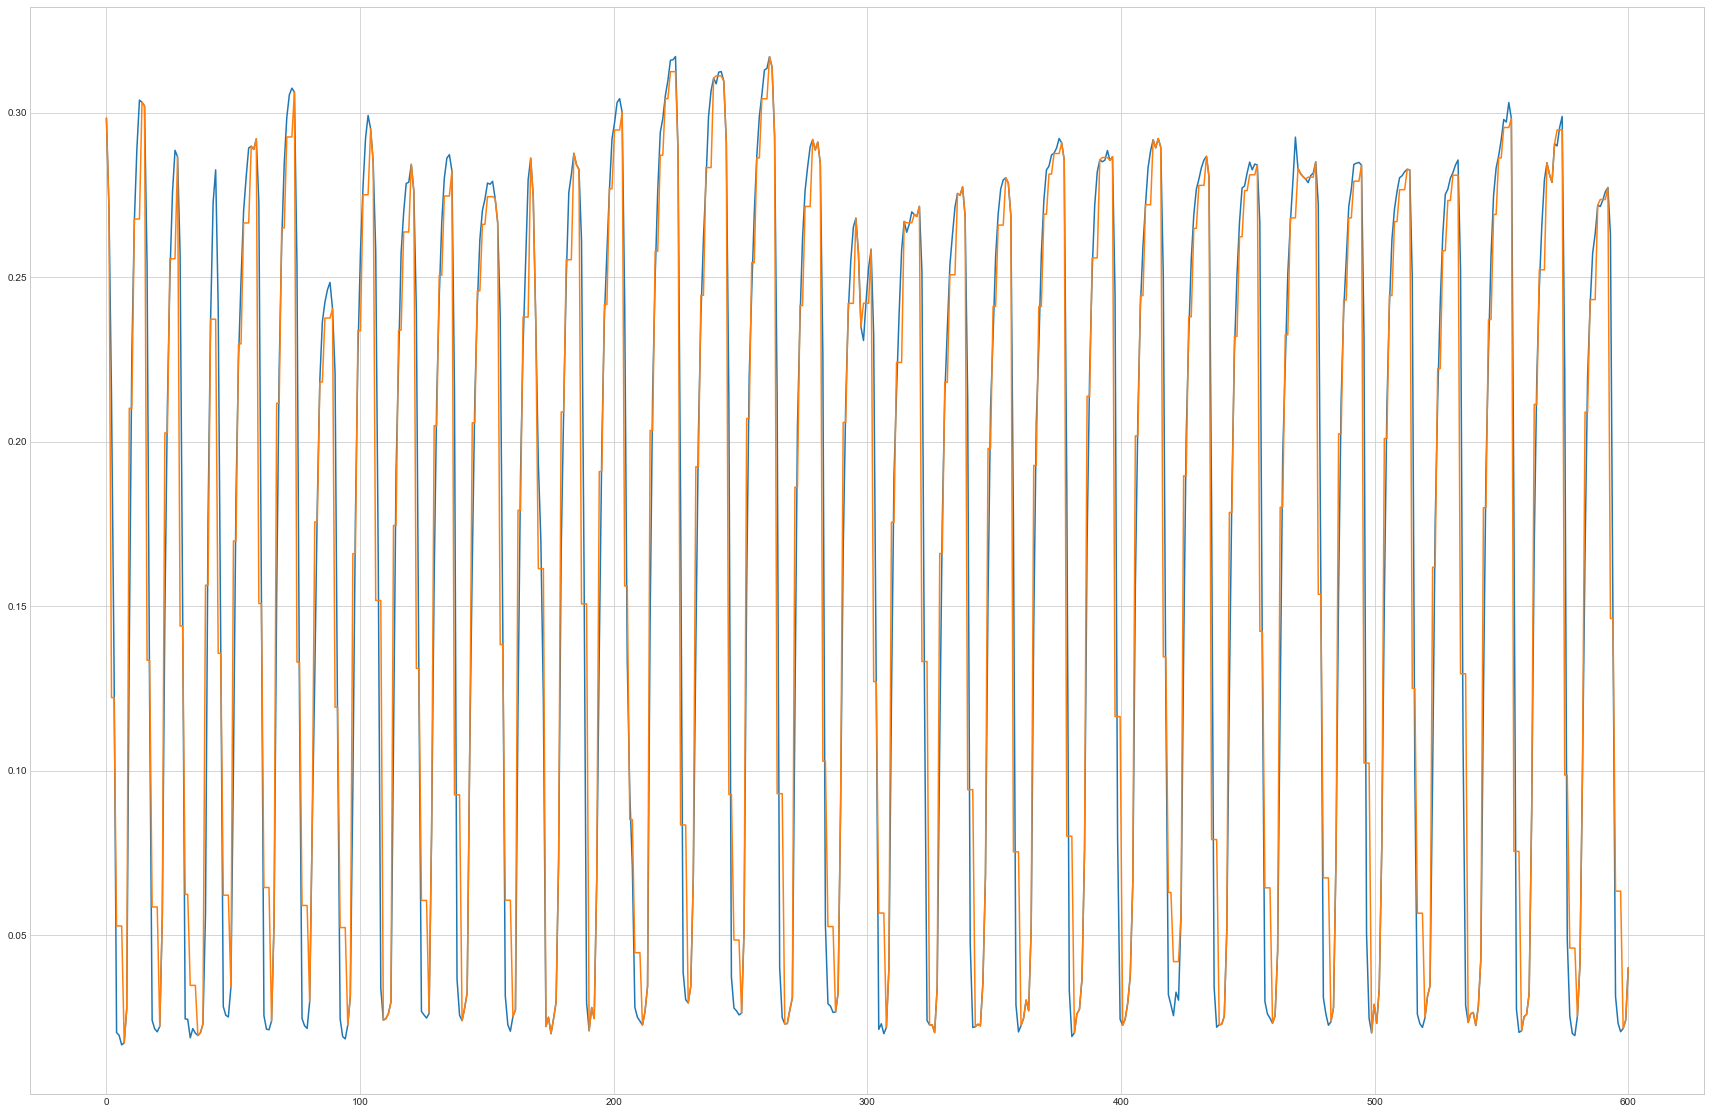

In [38]:
analizarVideo("../TFG/Videos/CONTROL02_03-02-2022_DCHA (M-73).mp4")
pass

#### Obtención de datos
Se obtienen los datos de todos los vídeos

In [ ]:
inicio = time.time()
datos = []
for i in glob.glob("../TFG/Videos/*"):
    aux = i.split("/")[-1].split("\\")[-1]
    print("\n", aux, "\n")
    datos.append(analizarVideo(i,guardar="../TFG/Outputs/Graficas/"+aux+"v11.png"))
    
fin = time.time()
print("Tiempo total:", fin - inicio)

In [ ]:
manos_der_izq_aux=[]
for i in glob.glob("..\TFG\Videos\*"):
    aux = i.split("\\")[-1]
    if aux.split("_")[-1].split(" ")[0][0] == 'D':
        manos_der_izq_aux.append('R')
    elif aux.split("_")[-1].split(" ")[0][0] == 'I':
        manos_der_izq_aux.append('L')

In [ ]:
diferencias = []
diferencia_min = []
diferencia_max = []
media_diferencias = []
minimos=[]
maximos=[]
minimo=[]
maximo=[]
media_maximos=[]
media_minimos=[]
manos_der_izq=[]
j=-1
salir = False
for d in datos:
    i = 1
    media = np.mean(d)
    j+=1
    for f in range(10):
        min_actual = float('inf')
        max_actual = 0
        if f == 5:
            i = -1
        while d[i] > media:
            if f == 5:
                i-=1
            else:
                i+=1
        while d[i] > media or not salir:
            if d[i] < media and d[i] < min_actual:
                min_actual = d[i] 
            if d[i] > media:
                salir = True
                if d[i] > max_actual:
                    max_actual = d[i]
            if f >= 5:
                i-=1
            else:
                i+=1
        salir = False
        
        minimos.append(min_actual)
        maximos.append(max_actual)
        diferencias.append(max_actual - min_actual)
        manos_der_izq.append(manos_der_izq_aux[j])
        
    diferencia_min.append(sorted(diferencias)[0])
    diferencia_max.append(sorted(diferencias)[-1])
    media_diferencias.extend(diferencias.copy())
    minimo.append(sorted(minimos)[0])
    maximo.append(sorted(maximos)[-1])
    media_minimos.extend(minimos.copy())
    media_maximos.extend(maximos.copy())
    diferencias.clear()
    minimos.clear()
    maximos.clear()

In [ ]:
'''
Se obtienen los datos de la lista normalizados con respecto al máximo y mínimo de cada vídeo.

Parámetros
 - lista: estructura con los datos que se van a normalizar.
 - maximo: punto máximo que se ha alcanzado.
 - minimo: punto mínimo que se ha alcanzado.
 
Retorno
 - norm: lista con los datos normalizados.
'''
def normalizacion(lista, maximo, minimo):
    norm = []
    p = 0
    for l in range(len(lista)):
        if l % 10 == 0 and l != 0:
            p+=1
        norm.append((lista[l] - minimo[p]) / (maximo[p] - minimo[p]))
    return norm

#### Extracción de los datos

In [ ]:
'''
Se extraen las columnas deseadas de la lista con los datos.

Parámetros:
 - lista: estructura con los datos que se desean extraer.
 - ruta: lugar donde se guardarán los ficheros con los datos extraídos.
 - columns: columnas que se desean extraer.
 - header: nombre de las columnas.
'''
def extraerDatos(df, ruta='../TFG/Outputs/Datos', columns = [0,1,2,3,4,5,6], header=['Max.', 'Min.', 'Diff.', 'Max. norm.', 'Min. norm.', 'Diff. norm.', 'Hand R/L']):
    df.transpose().to_csv(ruta + '/datos.csv', columns = columns, header=header, index=False, encoding='utf-8')
    df.transpose().to_excel(ruta + '/datos.xlsx', columns = columns, header=header, index=False, encoding='utf-8')

In [ ]:
lista = []
lista.append(media_maximos)
lista.append(media_minimos)
lista.append(media_diferencias)
lista.append(normalizacion(media_maximos, maximo, minimo))
lista.append(normalizacion(media_minimos, maximo, minimo))
lista.append(normalizacion(media_diferencias, diferencia_max, diferencia_min))
lista.append(manos_der_izq)
df = pd.DataFrame(lista)

#extraerDatos(df, columns = [0,1,2,6], header=['Max.', 'Min.', 'Diff.', 'Hand R/L'])
#extraerDatos(df, columns = [1], header = ['MIN'])
extraerDatos(df)